# CS235 - Data Mining Techniques
## Final Project Phase 1
### Name: quiet
### Student ID: :3

### Loading Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # data visualization library
from tqdm import tqdm
from collections import Counter

In [2]:
data_path = '/content/drive/MyDrive/CS235/wdbc.data'
data = pd.read_csv(data_path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
import pandas as pd

# Base attribute names
base_attributes = [
    'radius', 'texture', 'perimeter', 'area', 'smoothness',
    'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension'
]

# Create full list of attributes by appending [0, 1, 2] to each base attribute
attributes = []
for i in range(1,4):  # Assuming each attribute is measured three times
    for base in base_attributes:
        attributes.append(f"{base}{i}")

# Now add the 'id' and 'diagnosis' at the start
column_names = ['id', 'diagnosis'] + attributes
print(column_names)

['id', 'diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [4]:
data.columns = column_names

In [5]:
data.head()

,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
missing_values = data.isnull().sum()
print(missing_values)

id                    0
diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


# Implementing Simple Classifiers

## Decision Tree

I implement a Decision Tree which uses Infomation Gain as criterion for splitting. The tree is built recursively selecting the most important feature (that maximizes information gain at that node).
The class has methods for training, predition.

In [57]:
from collections import Counter

class DecisionTreeClassifierInfoGain:
    def __init__(self):
        # Set the initial root of the binary tree to None
        self.root = None

    def fit(self, features, targets):
        # Construct the binary tree using provided features and targets
        self.root = self._construct_tree(features, targets)

    def _construct_tree(self, features, targets):
        # Determine the number of samples and feature dimensions
        num_samples, num_features = features.shape

        # Base condition for creating a leaf node
        unique_labels = np.unique(targets)
        if len(unique_labels) == 1:
            return {'label': unique_labels[0]}

        # Another leaf node condition based on feature homogeneity
        if num_features == 1 and np.all(features == features[0, 0]):
            target_values = targets.flatten()
            most_frequent_class = Counter(target_values).most_common(1)[0][0]
            return {'label': most_frequent_class}

        # Variables to identify the optimal feature and threshold for splitting
        max_gain = float("-inf")
        optimal_feature = None
        optimal_threshold = None

        # Iterate over each feature to find the best split
        for idx in range(num_features):
            feature_values = features[:, idx]
            for threshold in np.unique(feature_values):
                left = np.where(features[:, idx] <= threshold)[0]
                right = np.where(features[:, idx] > threshold)[0]

                # Ignore splits that do not divide the dataset
                if len(left) == 0 or len(right) == 0:
                    continue

                # Compute the information gain from the split
                gain = self._compute_gain(targets, left, right)
                if gain > max_gain:
                    max_gain = gain
                    optimal_feature = idx
                    optimal_threshold = threshold

        # Perform the split using the optimal feature and threshold
        left = np.where(features[:, optimal_feature] <= optimal_threshold)[0]
        right = np.where(features[:, optimal_feature] > optimal_threshold)[0]

        # Recursively construct left and right subtrees
        left_tree = self._construct_tree(features[left], targets[left])
        right_tree = self._construct_tree(features[right], targets[right])

        return {
            'feature': optimal_feature,
            'threshold': optimal_threshold,
            'left_branch': left_tree,
            'right_branch': right_tree
        }

    def _compute_gain(self, targets, left_indices, right_indices):
        # Calculate total, left, and right entropy to determine information gain
        total_entropy = self._calculate_entropy(targets)
        left_entropy = self._calculate_entropy(targets[left_indices])
        right_entropy = self._calculate_entropy(targets[right_indices])

        total = len(targets)
        weight_left = len(left_indices) / total
        weight_right = len(right_indices) / total

        # Information gain formula
        return total_entropy - (weight_left * left_entropy + weight_right * right_entropy)

    def _calculate_entropy(self, targets):
        # Compute entropy for the given target labels
        _, label_counts = np.unique(targets, return_counts=True)
        probabilities = label_counts / len(targets)
        return -np.sum(probabilities * np.log2(probabilities))

    def predict(self, features):
        # Predict the class for each sample in features
        return np.array([self._traverse_tree(feature, self.root) for feature in features])

    def _traverse_tree(self, feature, node):
        # Recursive traversal to predict the class based on the feature values
        if 'label' in node:
            return node['label']

        # Decision on which branch to follow
        if feature[node['feature']] <= node['threshold']:
            return self._traverse_tree(feature, node['left_branch'])
        else:
            return self._traverse_tree(feature, node['right_branch'])


In [8]:
# Convert 'diagnosis' into binary labels
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target variable
droplist = ['id','diagnosis']
X = data.drop(droplist, axis=1).values
y = data['diagnosis'].values.reshape(-1,1)
X.shape[1]

30

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

# Initialize StratifiedKFold with 10 splits, shuffling, and a fixed random state
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to hold the computed accuracies and F1 scores for each fold
decision_tree_accuracies = []
decision_tree_f1_scores = []

# Loop through each fold from StratifiedKFold
for train_indices, test_indices in skf.split(X, y):
    # Use indices to split the dataset into train and test subsets for this fold
    features_train, features_test = X[train_indices], X[test_indices]
    targets_train, targets_test = y[train_indices], y[test_indices]

    # Initialize the decision tree (assuming DecisionTreeClassifierInfoGain is defined elsewhere) and train it
    tree_classifier = DecisionTreeClassifierInfoGain()
    tree_classifier.fit(features_train, targets_train)

    # Predict the target values for the test data
    predictions = tree_classifier.predict(features_test)

    # Compute accuracy and F1 score for the predictions
    dt_accuracy = accuracy_score(targets_test, predictions) * 100
    dt_f1 = f1_score(targets_test, predictions, pos_label=1)  # Use pos_label=1 as 'M' is mapped to 1

    decision_tree_accuracies.append(dt_accuracy)
    decision_tree_f1_scores.append(dt_f1)

# Calculate mean and standard deviation for accuracies and F1 scores
dt_mean_accuracy = np.mean(decision_tree_accuracies)
dt_std_accuracy = np.std(decision_tree_accuracies)
dt_mean_f1_score = np.mean(decision_tree_f1_scores)
dt_std_f1_score = np.std(decision_tree_f1_scores)

# Print the results with formatted output to show mean ± standard deviation
print(f"Decision Tree Classifier Accuracy: {dt_mean_accuracy:.2f}% ± {dt_std_accuracy:.2f}%")
print(f"Decision Tree Classifier F1 Score: {dt_mean_f1_score:.4f} ± {dt_std_f1_score:.4f}")



Decision Tree Classifier Accuracy: 93.33% ± 2.69%
Decision Tree Classifier F1 Score: 0.9097 ± 0.0415


# Naive Bayes with Gaussian Modelling

In [10]:
class NaiveBayesClassifierFromScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}

        for cls in self.classes:
            X_cls = X[np.ravel(y) == cls]
            self.parameters[cls] = {
                "mean": X_cls.mean(axis=0),
                "var": X_cls.var(axis=0) + 1e-8,  # Small constant for numerical stability
                "prior": X_cls.shape[0] / X.shape[0]
            }

    def _calculate_likelihood(self, mean, var, x):
        """Calculate Gaussian probability density function."""
        eps = 1e-8  # Small constant to avoid division by zero
        coef = 1 / np.sqrt(2 * np.pi * (var + eps))
        exponent = np.exp(-0.5 * ((x - mean) ** 2 / (var + eps)))
        return np.clip(coef * exponent, 1e-8, 1)

    def _calculate_posterior(self, x):
        """Calculate the posterior probabilities for each class."""
        posteriors = {}
        for cls, params in self.parameters.items():
            prior = np.log(params["prior"])
            likelihoods = np.sum(np.log(self._calculate_likelihood(params["mean"], params["var"], x)))
            posteriors[cls] = prior + likelihoods
        return max(posteriors, key=posteriors.get)

    def predict(self, X):
        return np.array([self._calculate_posterior(x) for x in X])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb_accuracies = []
nb_f1_scores = []

# Iterate over the splits generated by StratifiedKFold
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets using the current fold indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Instantiate and train the Naive Bayes classifier
    nb_classifier = NaiveBayesClassifierFromScratch()
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    nb_predictions = nb_classifier.predict(X_test)

    # Calculate accuracy & F1 score and append to the list
    nb_accuracy = accuracy_score(y_test.flatten(), nb_predictions) * 100  # Flatten if y_test is 2D
    nb_f1_score = f1_score(y_test.flatten(), nb_predictions, pos_label=1)  # Adjust pos_label according to your dataset

    nb_accuracies.append(nb_accuracy)
    nb_f1_scores.append(nb_f1_score)

In [12]:
# Calculate the mean and standard deviation of the Naive Bayes classifier accuracies
nb_accuracy = np.mean(nb_accuracies)  # Mean accuracy
nb_accuracy_std = np.std(nb_accuracies)  # Standard deviation of accuracies

# Calculate the mean and standard deviation of the F1 scores
nb_f1_score = np.mean(nb_f1_scores)  # Mean F1 score
nb_f1_score_std = np.std(nb_f1_scores)  # Standard deviation of F1 scores

# Print the results with formatted output to show mean ± standard deviation
print(f"Naive Bayes Classifier Accuracy: {nb_accuracy:.2f}% ± {nb_accuracy_std:.2f}%")
print(f"Naive Bayes Classifier F1 Score: {nb_f1_score:.4f} ± {nb_f1_score_std:.4f}")


Naive Bayes Classifier Accuracy: 93.68% ± 2.24%
Naive Bayes Classifier F1 Score: 0.9135 ± 0.0318


## Perfomance

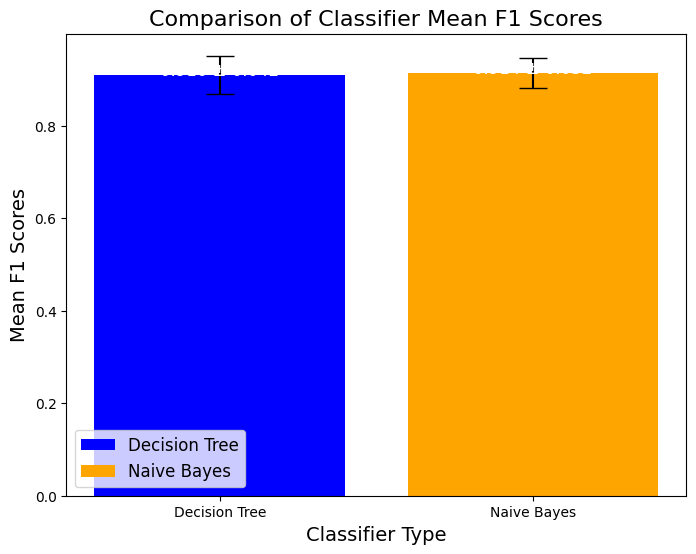

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifier_names = ['Decision Tree', 'Naive Bayes']

# Calculate mean F1 Scores of classifiers
mean_f1_scores = [np.mean(decision_tree_f1_scores), np.mean(nb_f1_scores)]

# Calculate standard deviations of F1 scores
f1_score_stds = [np.std(decision_tree_f1_scores), np.std(nb_f1_scores)]

# Create a plot
plt.figure(figsize=(8, 6))

# Create bar chart with error bars
error_bars = plt.bar(classifier_names, mean_f1_scores, yerr=f1_score_stds, capsize=10, color=['blue', 'orange'])
plt.xlabel('Classifier Type', fontsize=14)
plt.ylabel('Mean F1 Scores', fontsize=14)
plt.title('Comparison of Classifier Mean F1 Scores', fontsize=16)
plt.legend(error_bars, classifier_names, fontsize=12)

# Add F1 score values inside each bar
for bar, score, std_dev in zip(error_bars, mean_f1_scores, f1_score_stds):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.3f} \u00B1 {std_dev:.3f}', ha='center', color='white', fontsize=12)

# Display the plot
plt.show()


# Singular Value Decomposition for Dimensionality Reduction

1. Singular Value Decomposition (SVD):
The NumPy library was used to perform SVD on the training dataset matrix.
This decomposition results in three matrices: $U$, $S$, and $V^T$, which represent the orthogonal matrices and the singular values.

2. Dimensionality Reduction:
Dimensionality reduction was applied to both training and testing datasets by projecting them onto a space defined by a subset of the U matrix vectors.
This approach ensures consistent application across both datasets and prevents data leakage.

3. Training and Evaluating Classifiers:
Classifiers, specifically Decision Tree and Naive Bayes, were trained using the dimensionally reduced training data.
The classifiers were then evaluated on the reduced test data using the F1 score as the evaluation metric.

4. Visualization:
A graphical representation was produced to illustrate the performance of the classifiers across various SVD rank approximations.
The chart displays the different SVD ranks along the x-axis and the corresponding F1 scores of the classifiers on the y-axis.

In [14]:
# Define a function to apply dimensionality reduction via Singular Value Decomposition (SVD)
def dimension_reduction_svd(X_train, X_test, components):
    # Calculate SVD on the training set
    U, Sigma, V_transposed = np.linalg.svd(X_train, full_matrices=False)

    # Limit the SVD output to the desired number of components
    U_truncated = U[:, :components]  # Keep only the first 'components' left singular vectors
    Sigma_truncated = np.diag(Sigma[:components])  # Create a diagonal matrix of the first 'components' singular values
    V_transposed_truncated = V_transposed[:components, :]  # Keep the first 'components' right singular vectors

    # Transform the training data to a lower-dimensional space
    X_train_transformed = np.dot(U_truncated, Sigma_truncated)

    # Transform the test data using the same transformation matrix
    X_test_transformed = np.dot(X_test, V_transposed_truncated.T)

    # Output the dimensionally reduced training and test datasets
    return X_train_transformed, X_test_transformed


In [15]:
# Determine the number of features in the dataset
feature_count = X.shape[1]
print(feature_count)
# Establish a sequence for testing different dimensions for reduction
dimension_range = range(1, feature_count + 1)

# Prepare containers to store performance metrics for classifiers
accuracies_decision_tree = []
accuracies_naive_bayes = []

# Prepare containers for variability in performance metrics
std_deviation_decision_tree = []
std_deviation_naive_bayes = []

# Lists for recording F1 scores of classifiers
f1_scores_decision_tree = []
f1_scores_naive_bayes = []

# Lists for recording standard deviations of F1 scores
f1_std_deviation_decision_tree = []
f1_std_deviation_naive_bayes = []

# A list to track which dimensions were tested
tested_dimensions = []

# Process each dimension in the specified range
for dimension in tqdm(dimension_range):
    # Temporary lists to store scores for each cross-validation fold
    naive_bayes_scores = []
    decision_tree_scores = []

    naive_bayes_f1 = []
    decision_tree_f1 = []

    # Utilize StratifiedKFold for systematic cross-validation
    for train_idx, test_idx in skf.split(X, y):
        # Segment the data into training and testing groups
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Apply SVD-based dimensionality reduction
        X_train_dim_reduced, X_test_dim_reduced = dimension_reduction_svd(X_train, X_test, dimension)

        # Ensure y_train and y_test are 1D arrays
        y_train = y_train.ravel()
        y_test = y_test.ravel()

        # Evaluate Naive Bayes classifier
        model_naive_bayes = NaiveBayesClassifierFromScratch()
        model_naive_bayes.fit(X_train_dim_reduced, y_train)
        predictions_naive = model_naive_bayes.predict(X_test_dim_reduced)
        accuracy_naive = accuracy_score(y_test, predictions_naive)
        naive_bayes_scores.append(accuracy_naive * 100)
        f1_naive = f1_score(y_test, predictions_naive, average='weighted')
        naive_bayes_f1.append(f1_naive)

        # Evaluate Decision Tree classifier
        model_decision_tree = DecisionTreeClassifierInfoGain()
        model_decision_tree.fit(X_train_dim_reduced, y_train)
        predictions_tree = model_decision_tree.fit(X_test_dim_reduced)
        accuracy_tree = accuracy_score(y_test, predictions_tree)
        decision_tree_scores.append(accuracy_tree * 100)
        f1_tree = f1_score(y_test, predictions_tree, average='weighted')
        decision_tree_f1.append(f1_tree)

    # Compute and store the mean and standard deviation of accuracy and F1 score for Naive Bayes
    mean_accuracy_naive = np.mean(naive_bayes_scores)
    std_accuracy_naive = np.std(naive_bayes_scores)
    mean_f1_naive = np.mean(naive_bayes_f1)
    std_f1_naive = np.std(naive_bayes_f1)
    accuracies_naive_bayes.append(mean_accuracy_naive)
    std_deviation_naive_bayes.append(std_accuracy_naive)
    f1_scores_naive_bayes.append(mean_f1_naive)
    f1_std_deviation_naive_bayes.append(std_f1_naive)

    # Compute and store the mean and standard deviation of accuracy and F1 score for Decision Tree
    mean_accuracy_tree = np.mean(decision_tree_scores)
    std_accuracy_tree = np.std(decision_tree_scores)
    mean_f1_tree = np.mean(decision_tree_f1)
    std_f1_tree = np.std(decision_tree_f1)
    accuracies_decision_tree.append(mean_accuracy_tree)
    std_deviation_decision_tree.append(std_accuracy_tree)
    f1_scores_decision_tree.append(mean_f1_tree)
    f1_std_deviation_decision_tree.append(std_f1_tree)

    # Record the tested dimension
    tested_dimensions.append(dimension)


30


100%|██████████| 30/30 [19:21<00:00, 38.71s/it]


## Performance

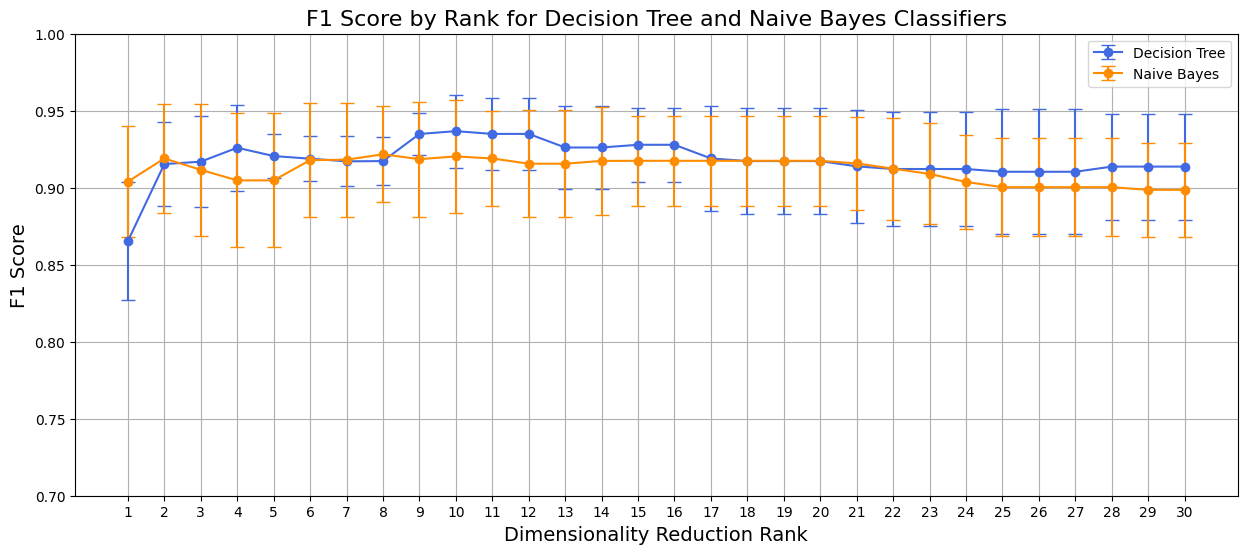

In [17]:
import matplotlib.pyplot as plt

# Create a single figure to plot both classifiers
plt.figure(figsize=(15, 6))

# Plot Decision Tree F1 Scores
plt.errorbar(
    tested_dimensions,  # x-axis: ranks tested for Decision Tree
    f1_scores_decision_tree,  # y-axis: F1 scores for Decision Tree
    yerr=f1_std_deviation_decision_tree,  # Error bars for Decision Tree
    fmt='-o',  # Line style
    color='royalblue',  # Color for Decision Tree plot
    capsize=5,  # Cap size for error bars
    label='Decision Tree'  # Label for the legend
)

# Plot Naive Bayes F1 Scores
plt.errorbar(
    tested_dimensions,  # x-axis: ranks tested for Naive Bayes
    f1_scores_naive_bayes,  # y-axis: F1 scores for Naive Bayes
    yerr=f1_std_deviation_naive_bayes,  # Error bars for Naive Bayes
    fmt='-o',  # Line style
    color='darkorange',  # Color for Naive Bayes plot
    capsize=5,  # Cap size for error bars
    label='Naive Bayes'  # Label for the legend
)

# Set the plot labels and title
plt.xlabel('Dimensionality Reduction Rank', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('F1 Score by Rank for Decision Tree and Naive Bayes Classifiers', fontsize=16)

# Add x-axis ticks; ensure they cover all dimensions tested in both models
plt.xticks(list(set(tested_dimensions + tested_dimensions)))  # Combine and set unique ranks

# Add a grid for better readability
plt.grid(True)

# Set the y-axis limit for better focus on relevant score ranges
plt.ylim(0.7, 1)

# Add a legend to distinguish between classifiers
plt.legend()

# Display the combined plot
plt.show()


# Randomized Feature Selection

### Step 1: Initial Data Sampling

We start by sampling 20% of the entire dataset. This sample is stratified to ensure that the class distribution remains consistent with the full dataset.


### Step 2: Feature Selection Methodology

For each feature, we create a modified dataset where the feature's values are randomly permuted. We then train models on both the original and the modified dataset within a 5-fold cross-validation framework to assess robustness.


### Step 3: Model Evaluation

We compute the average F1 score across all folds for each model (original and modified) to assess the impact of randomizing each feature.


### Step 4: Feature Importance Calculation

The percentage drop in performance (F1 score) between the model trained on the actual data and the model with the randomized feature is calculated and used as a measure of feature importance.


### Step 5: Ranking Features

Features are ranked according to their calculated importance from most to least critical.


### Step 6: Calculating Performance for K Most Important Features

The models are then trained considering only the top K important features, where K ranges from 1 to 10, using 10-fold cross-validation.


### Step 7: Plotting

We create visual representations of feature importance and the effect of incrementally including more top features on model performance.


In [46]:
print(column_names[2:])

['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


In [101]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

# Exclude the first two columns and take the rest as features
feature_names = column_names[2:]


# Split the data into a 20% subset for evaluating feature importance
train_features, validate_features, train_labels, validate_labels = train_test_split(
    X, y, test_size=0.8, stratify=y, random_state=50)

# Dictionaries to hold the importance scores of features
importance_scores_dt = {}
importance_scores_gnb = {}

# 5-fold Stratified cross-validation setup
cross_validator = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)

# Evaluate the importance of each feature using Decision Tree and Gaussian Naive Bayes
for index, feature in tqdm(enumerate(feature_names), desc="Evaluating Feature Importance"):
    actual_dt_scores, randomized_dt_scores = [], []
    actual_gnb_scores, randomized_gnb_scores = [], []

    # Stratified 5-Fold cross-validation on the sampled 20% data
    for train_idx, test_idx in cross_validator.split(train_features, train_labels):
        X_train, X_test = train_features[train_idx], train_features[test_idx]
        y_train, y_test = train_labels[train_idx], train_labels[test_idx]

        # Decision Tree: Train on actual and randomized data
        decision_tree = DecisionTreeClassifierInfoGain()
        decision_tree.fit(X_train, y_train)
        actual_dt_scores.append(f1_score(y_test, decision_tree.predict(X_test)))

        # Randomize the current feature and evaluate again
        X_train_shuffled = X_train.copy()
        np.random.shuffle(X_train_shuffled[:, index])
        decision_tree.fit(X_train_shuffled, y_train)
        randomized_dt_scores.append(f1_score(y_test, decision_tree.predict(X_test)))

        # Gaussian Naive Bayes: Train on actual and randomized data
        gnb = NaiveBayesClassifierFromScratch()
        gnb.fit(X_train, y_train)
        actual_gnb_scores.append(f1_score(y_test, gnb.predict(X_test)))

        X_train_shuffled = X_train.copy()
        np.random.shuffle(X_train_shuffled[:, index])
        gnb.fit(X_train_shuffled, y_train)
        randomized_gnb_scores.append(f1_score(y_test, gnb.predict(X_test)))

    # Calculate feature importance as the percentage drop in F1 score when the feature is randomized
    mean_actual_dt = np.mean(actual_dt_scores)
    mean_random_dt = np.mean(randomized_dt_scores)
    importance_dt = ((mean_actual_dt - mean_random_dt) / mean_actual_dt) * 100
    importance_scores_dt[feature] = (importance_dt, index)

    mean_actual_gnb = np.mean(actual_gnb_scores)
    mean_random_gnb = np.mean(randomized_gnb_scores)
    importance_gnb = ((mean_actual_gnb - mean_random_gnb) / mean_actual_gnb) * 100
    importance_scores_gnb[feature] = (importance_gnb, index)

# Organize features by their importance for each classifier
sorted_features_dt = sorted(importance_scores_dt.items(), key=lambda item: item[1][0], reverse=True)
features_dt, values_dt = zip(*sorted_features_dt)

sorted_features_gnb = sorted(importance_scores_gnb.items(), key=lambda item: item[1][0], reverse=True)
features_gnb, values_gnb = zip(*sorted_features_gnb)


Evaluating Feature Importance: 30it [00:02, 11.13it/s]


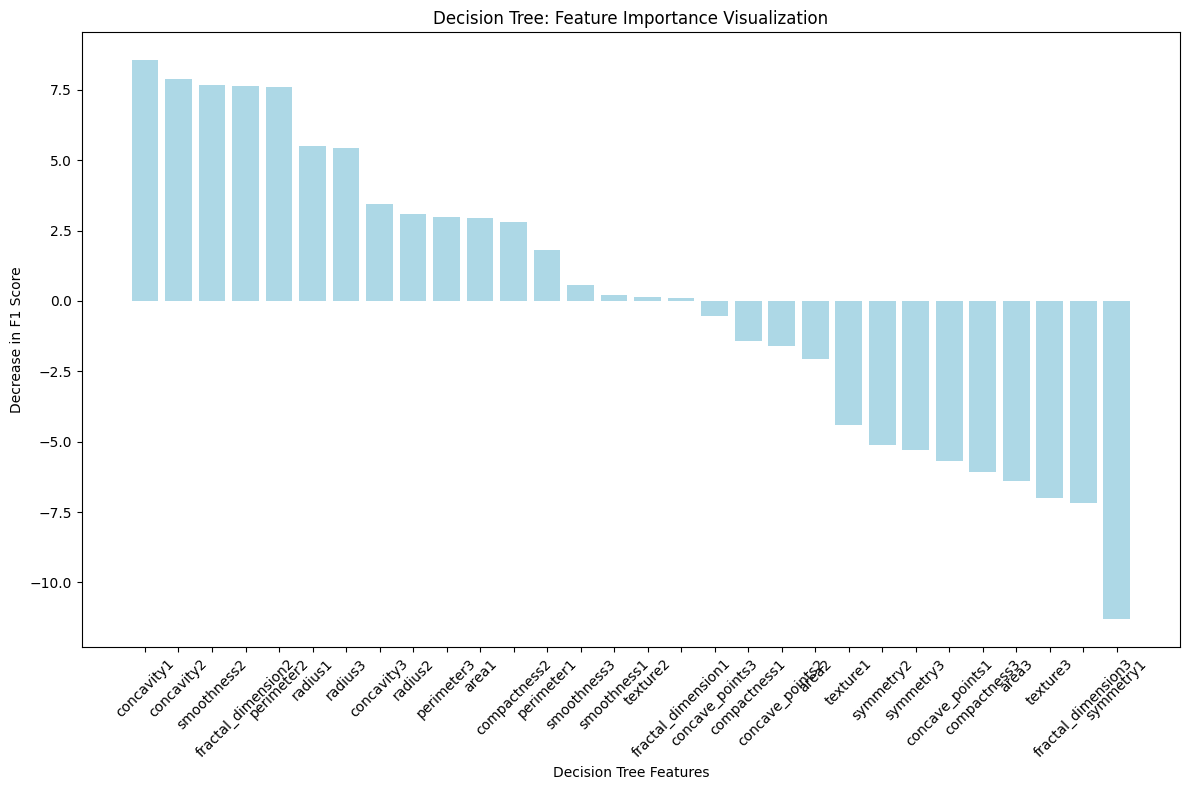

In [102]:
import matplotlib.pyplot as plt

# Visualize the importance of each feature as determined by the Decision Tree
plt.figure(figsize=(12, 8))  # Set the size of the plot

# Extract the feature importance scores from 'values_dt'
importance_scores_decide = [score[0] for score in values_dt]  # Adjust to access the correct data

# Create a bar chart showing the average drop in F1 score due to feature randomization
plt.bar(features_dt, importance_scores_decide, color='lightblue')  # Using the extracted scores
plt.xlabel('Decision Tree Features')  # More concise label
plt.ylabel('Decrease in F1 Score')  # Simplified label
plt.title('Decision Tree: Feature Importance Visualization')  # Adjusted title for clarity
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()  # Display the plot


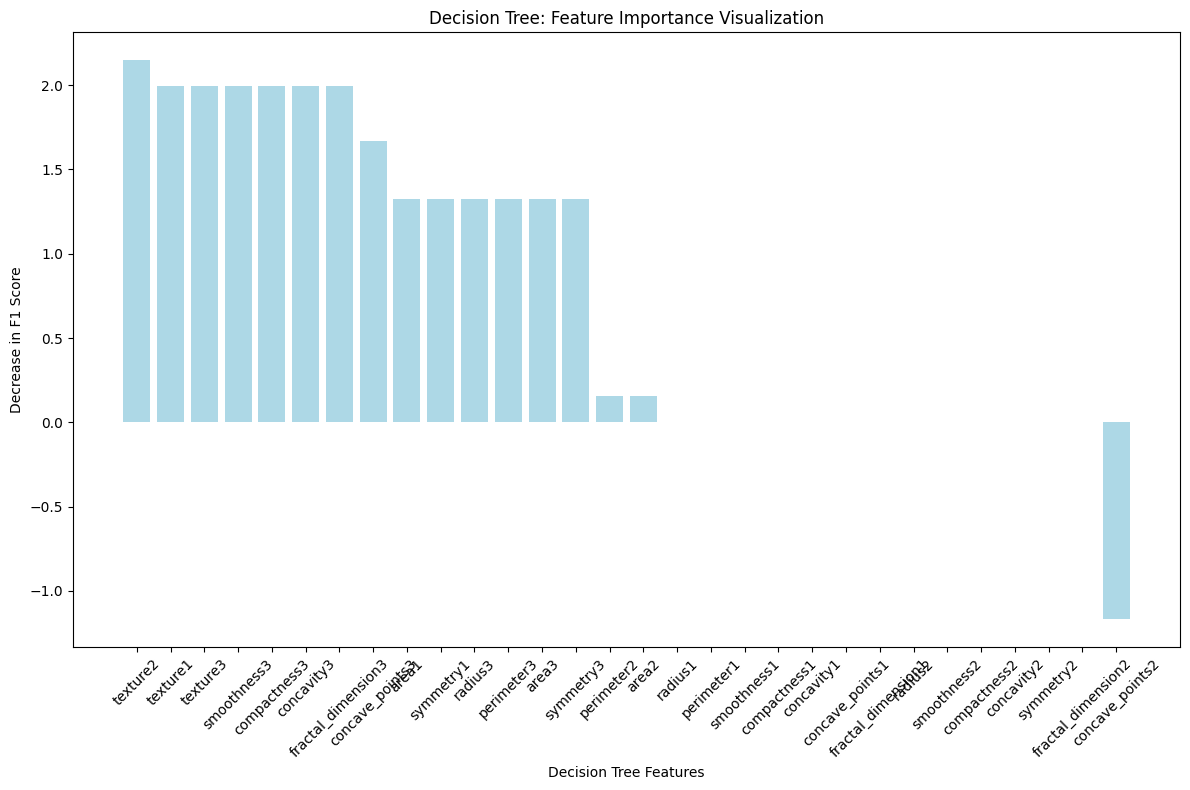

In [103]:
import matplotlib.pyplot as plt

# Correct data extraction based on the structure of 'values_gnb'
if values_gnb and isinstance(values_gnb[0], (list, tuple)):
    # If 'values_gnb' contains lists or tuples, extract the first element
    importance_scores_dt = [score[0] for score in values_gnb]
else:
    # If 'values_gnb' contains scalar values directly, use it as is
    importance_scores_dt = values_gnb

# Plotting the bar chart of feature importances for Decision Tree
plt.figure(figsize=(12, 8))
plt.bar(features_gnb, importance_scores_dt, color='lightblue')  # Ensure variable names match corrected code
plt.xlabel('Decision Tree Features')
plt.ylabel('Decrease in F1 Score')
plt.title('Decision Tree: Feature Importance Visualization')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()


We'll now utilize the remaining 80% of the data to assess our models' performance by training them with our identified top features. Starting with just one feature and incrementally adding up to 10, we'll measure the models' effectiveness through stratified 10-fold cross-validation. Since we've derived two distinct sets of top features using the Decision Tree (DT) and Gaussian Naive Bayes (GNB) methods, we'll evaluate both feature sets across each model to compare their performance.

In [104]:
type(values_gnb)
print(values_gnb)

((2.147956791811555, 11), (1.9924209868343874, 1), (1.9924209868343874, 21), (1.9924209868343874, 24), (1.9924209868343874, 25), (1.9924209868343874, 26), (1.9924209868343874, 29), (1.6664550533265556, 27), (1.3220543423057443, 3), (1.3220543423057443, 8), (1.3220543423057443, 20), (1.3220543423057443, 22), (1.3220543423057443, 23), (1.3220543423057443, 28), (0.15553580497714267, 12), (0.15553580497714267, 13), (0.0, 0), (0.0, 2), (0.0, 4), (0.0, 5), (0.0, 6), (0.0, 7), (0.0, 9), (0.0, 10), (0.0, 14), (0.0, 15), (0.0, 16), (0.0, 18), (0.0, 19), (-1.1665185373286016, 17))


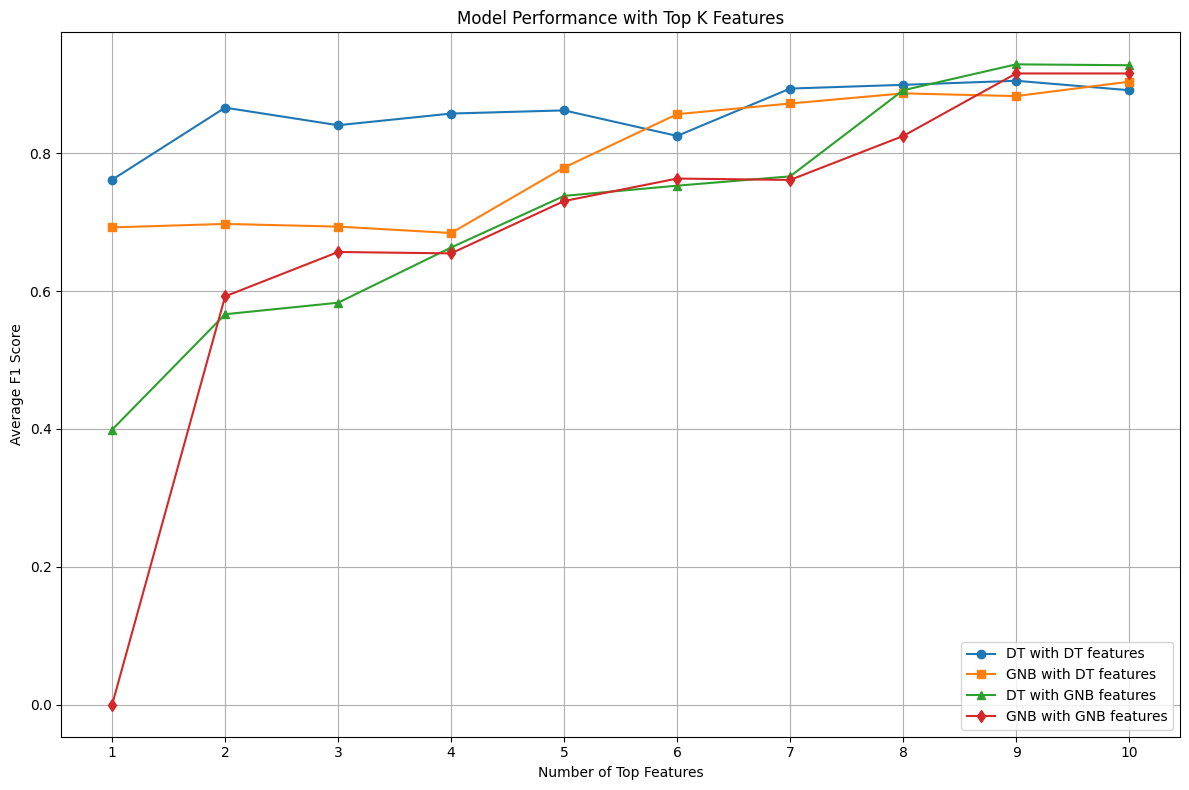

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

# Remaining 80% of the data
remaining_features, remaining_labels = validate_features, validate_labels

# Initialize results storage
performance_dt = {k: [] for k in range(1, 11)}
performance_gnb = {k: [] for k in range(1, 11)}

# Function to evaluate models with top K features
def evaluate_model_with_top_k_features(model, top_features, X, y):
    cross_validator = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
    performance_scores = {k: [] for k in range(1, 11)}

    for k in range(1, 11):
        top_k_features = top_features[:k]
        X_k = X[:, [feature_names.index(f) for f in top_k_features]]

        for train_idx, test_idx in cross_validator.split(X_k, y):
            X_train, X_test = X_k[train_idx], X_k[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            performance_scores[k].append(f1_score(y_test, y_pred))

    return {k: np.mean(scores) for k, scores in performance_scores.items()}

# Evaluate Decision Tree with DT top features
decision_tree = DecisionTreeClassifierInfoGain()
dt_top_features = [feature for feature, _ in sorted_features_dt]
performance_dt = evaluate_model_with_top_k_features(decision_tree, dt_top_features, remaining_features, remaining_labels)

# Evaluate Gaussian Naive Bayes with DT top features
gnb = NaiveBayesClassifierFromScratch()
performance_gnb = evaluate_model_with_top_k_features(gnb, dt_top_features, remaining_features, remaining_labels)

# Evaluate Decision Tree with GNB top features
gnb_top_features = [feature for feature, _ in sorted_features_gnb]
performance_dt_gnb = evaluate_model_with_top_k_features(decision_tree, gnb_top_features, remaining_features, remaining_labels)

# Evaluate Gaussian Naive Bayes with GNB top features
performance_gnb_gnb = evaluate_model_with_top_k_features(gnb, gnb_top_features, remaining_features, remaining_labels)

# Plot the results
plt.figure(figsize=(12, 8))

k_values = range(1, 11)
plt.plot(k_values, [performance_dt[k] for k in k_values], 'o-', label='DT with DT features')
plt.plot(k_values, [performance_gnb[k] for k in k_values], 's-', label='GNB with DT features')
plt.plot(k_values, [performance_dt_gnb[k] for k in k_values], '^-', label='DT with GNB features')
plt.plot(k_values, [performance_gnb_gnb[k] for k in k_values], 'd-', label='GNB with GNB features')

plt.xlabel('Number of Top Features')
plt.ylabel('Average F1 Score')
plt.title('Model Performance with Top K Features')
plt.xticks(k_values)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


## Implementing SMOTE for Class Imbalance Correction
This method utilizes the Synthetic Minority Over-sampling Technique (SMOTE) to counteract class imbalances within a dataset. It starts by pinpointing the minority class, then employs the k-nearest neighbors algorithm to examine its distribution. By interpolating between instances of the minority class and their nearest neighbors, synthetic data points are created. These points are incorporated back into the original dataset based on the specified oversampling percentage, `oversampling_per`, and the number of neighbors, `k`, enhancing the dataset's balance for training machine learning models.

In [96]:
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [99]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def smote(X, y, oversampling_percentage, num_neighbors):
    if oversampling_percentage == 0:
        return X.copy(), y.copy()

    # Ensure that X and y have matching first dimensions
    if X.shape[0] != y.shape[0]:
        raise ValueError("The number of samples in X and y must match.")

    # Flatten y to ensure it's 1-dimensional
    y = y.ravel()

    # Determine the minority class based on the count
    classes, counts = np.unique(y, return_counts=True)
    minority_class = classes[np.argmin(counts)]

    # Create a boolean mask for the minority class
    minority_mask = (y == minority_class)

    if minority_mask.sum() == 0:
        raise ValueError("No samples found for the minority class.")

    minority_data = X[minority_mask]

    # Ensure there are enough minority samples to proceed
    if len(minority_data) <= num_neighbors:
        raise ValueError("Not enough minority samples to perform SMOTE.")

    # Train a k-nearest neighbors model on the minority data
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1, algorithm='auto').fit(minority_data)
    distances, indices = nbrs.kneighbors(minority_data)

    # Generate synthetic samples
    synthetic_samples = []
    num_samples_to_generate = int((oversampling_percentage / 100) * len(minority_data))
    for _ in range(num_samples_to_generate):
        sample_index = np.random.randint(0, len(minority_data))
        neighbor_index = np.random.randint(1, num_neighbors + 1)  # Avoid self-neighbor (0 index)
        difference = minority_data[indices[sample_index, neighbor_index]] - minority_data[sample_index]
        new_sample = minority_data[sample_index] + np.random.rand() * difference
        synthetic_samples.append(new_sample)

    # Append synthetic samples to the original dataset
    if synthetic_samples:
        synthetic_samples = np.vstack(synthetic_samples)
        synthetic_labels = np.full(len(synthetic_samples), minority_class)
        return np.vstack([X, synthetic_samples]), np.hstack([y, synthetic_labels])
    else:
        return X.copy(), y.copy()

# Instantiate classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifierInfoGain(),
    'Gaussian Naive Bayes': NaiveBayesClassifierFromScratch()
}

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Define oversampling parameters
oversampling_percentages = [0, 100, 200, 300]
neighbor_values = [1, 5]

# Prepare to store results
results = {name: {k: [] for k in neighbor_values} for name in classifiers}

# Training and evaluation loop
for k in neighbor_values:
    for percentage in oversampling_percentages:
        X_train_smote, y_train_smote = smote(X_train, y_train, percentage, k)
        for name, clf in classifiers.items():
            clf.fit(X_train_smote, y_train_smote)
            predictions = clf.predict(X_test)
            f1 = f1_score(y_test.ravel(), predictions)  # Ensure y_test is 1-dimensional
            results[name][k].append(f1)

Lets evaluate the models on data where we use SMOTE to perform minority class oversampling.

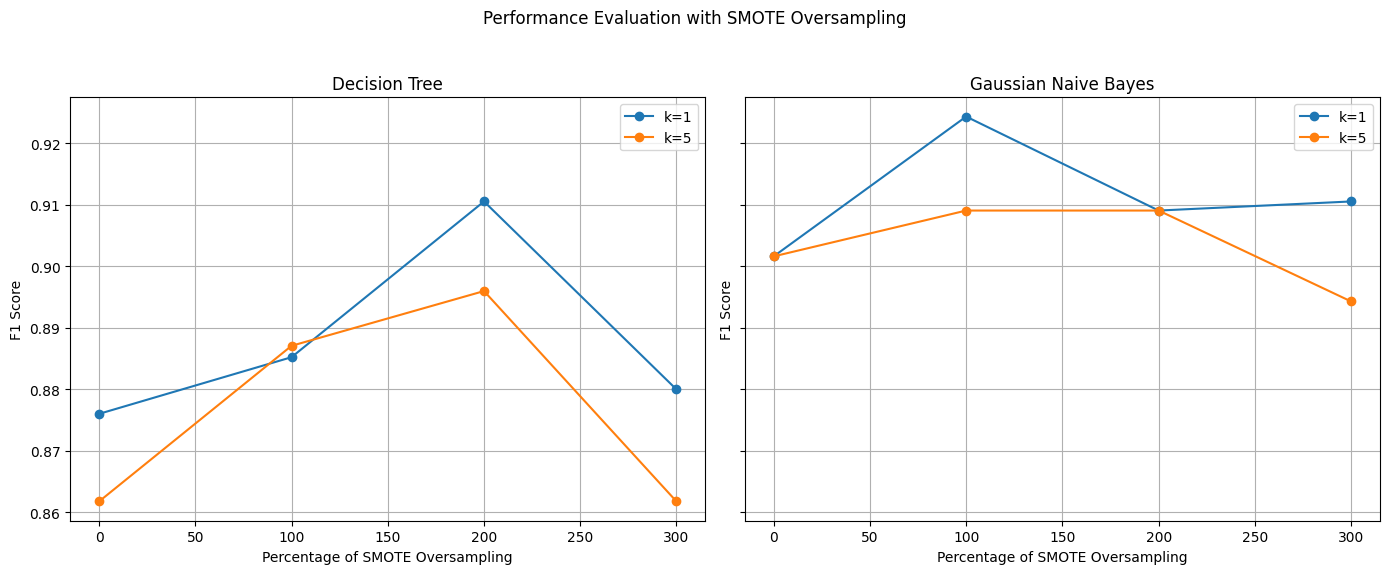

In [100]:
# Plot results
fig, axes = plt.subplots(1, len(classifiers), figsize=(14, 6), sharey=True)
fig.suptitle('Performance Evaluation with SMOTE Oversampling')

for idx, (name, data) in enumerate(results.items()):
    for k, scores in data.items():
        axes[idx].plot(oversampling_percentages, scores, marker='o', label=f'k={k}')
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Percentage of SMOTE Oversampling')
    axes[idx].set_ylabel('F1 Score')
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()